In [1]:
import cv2
import matplotlib.pyplot as plt

from picamera.array import PiRGBArray
from picamera import PiCamera

def pltShow(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)

camera = PiCamera()
camera.resolution = (640, 480)

camera.capture('temp.jpg')

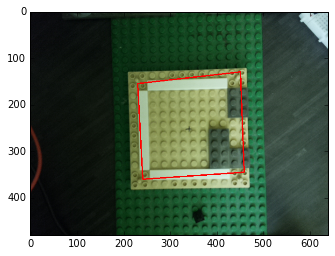

In [4]:
upper_left = (230, 155)
upper_right = (450, 140)
down_left = (246, 30)
down_right = (458, 345)

f = cv2.imread("temp.jpg")
cv2.line(f, upper_left, upper_right, (0, 0, 255), 2)
cv2.line(f, upper_right, down_right, (0, 0, 255), 2)
cv2.line(f, down_right, down_left, (0, 0, 255), 2)
cv2.line(f, down_left, upper_left, (0, 0, 255), 2)

pltShow(f)

In [3]:
camera.close()